## **Simple Linear Regression**

In [0]:
# 출처: 모두의 딥러닝
import tensorflow as tf
import numpy as np
print(tf.__version__)
# tf.enable_eager_execution() : TensorFlow 2.0 버전 이상부터는 기본적으로 활성화 되어 있음. 그래프기반모드->즉시실행모드
# 기존 그래프 기반 방식에서 벗어나 그래프 생성 없이 연산을 즉시 실행하는 명령

2.2.0-rc2


# $$ H(x) = Wx + b $$

In [0]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

# $$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (H{(x }^{ (i) })-y^{ (i) } })^{ 2 } }  $$



In [0]:
W.numpy(), b.numpy()

(2.9, 0.5)

In [0]:
hypothesis.numpy()

array([ 3.4     ,  6.3     ,  9.200001, 12.1     , 15.      ],
      dtype=float32)

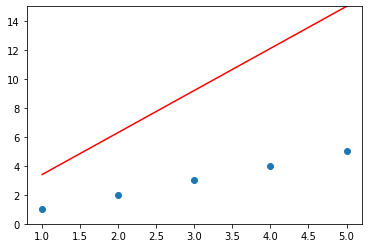

In [0]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 15)
plt.show()

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# tf.reduce_mean

In [0]:
v =[1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

# tf.square()

In [0]:
tf.square(3) # 9

<tf.Tensor: shape=(), dtype=int32, numpy=9>

# **Gradient Descent** (minimize  cost (W, b))
  ## : cost를 minimize 하는 W와 b를 찾는 알고리즘.



In [0]:
learning_rate = 0.01
for i in range(101): # 101번 반복 0~100
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b]) # W와 b의 미분값
    # 파라미터(W와 b값) 업데이트
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    # 10번째 step마다 W와 b값 출력
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059
  100|    1.0048|   -0.0173|  0.000055


[0.98742765 1.9922441  2.9970603  4.001877   5.0066934 ]


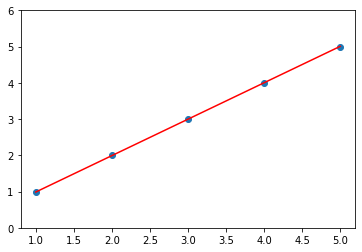

In [0]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 6)
print(hypothesis.numpy())

# **Predict**

Hypothesis H(x) = Wx + b

In [0]:
# predict
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)
